# <div class="alert alert-danger" > Iterative Prompt Develelopment</div>
In this lesson, you'll iteratively analyze and refine your prompts to generate marketing copy from a product fact sheet.

When I've been building applications with large language models, I don't think I've ever come to the prompt that I ended up using in the final application on my first attempt. And this isn't what matters. As long as you have a good process to iteratively make your prompt better, then you'll be able to come to something that works well for the task you want to achieve. 

You may have heard me say that when I train a machine learning model, it almost never works the first time. In fact, I'm 
very surprised that the first model I trained works. I think we're prompting, the odds of it working the first time is maybe a little bit higher but it doesn't matter if the first prompt works, what matters most is the process for getting to prompts that works for your application. So with that, let's jump into the code and let me show you some frameworks to think about how to 
iteratively develop a prompt. 

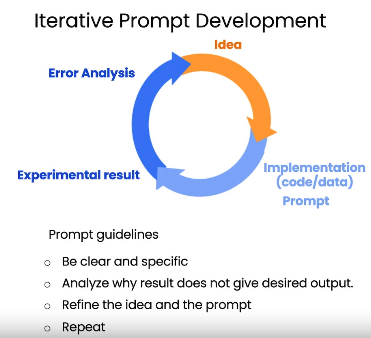

If you've taken a machine learning class with me before, you may have seen me use a diagram saying that with machine learning development, you often have an idea and then implement it. So, write the code, get the data, train your model, and that gives you an experimental result. And you can then look at that output, maybe do error analysis, figure out where it's working or not working, and then maybe even change your idea of exactly what problem you want to solve or how to approach it. And then change implementation and run another experiment and so on, and iterate over and over to get to an effective machine learning model. 

When you are writing prompts to develop an application using an LLM, the process can be quite similar, where you have an idea for what you want to do, the task you want to complete, and you can then take a first attempt at writing a prompt that hopefully is clear and specific, and maybe, if appropriate, gives the system time to think. And then you can run it and see what result you get. And if it doesn't work well enough the first time, then the iterative process of figuring out why the instructions, for example, were not clear enough, or why it didn't give the algorithm enough time to think, allows you to refine the idea, refine the prompt, and so on, and to go around this loop multiple times until you end up with a prompt that 
works for your application. 

This too is why I personally have not paid as much attention to the internet articles that say 30 perfect prompts, because I think, there probably isn't a perfect prompt for everything under the sun. It's more important that you have a process for developing a good prompt for your specific application. 


So, let's look at an example together in code. 


### <div class="alert alert-success" > Setup</div>

I have here the starter code that you saw in the previous videos, have import OpenAI, import OS. Here we get the OpenAI API key, and this is the same helper function that you saw as last time. And I'm going to use as the running example in this video, the task of summarizing a fact sheet for a chair. So, let me just paste that in here. 

In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [2]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

### <div class="alert alert-success" >  Generate a marketing product description from a product fact sheet

In [4]:
fact_sheet_chair = """

OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy

"""

So, let's say you want to take this fact sheet and help a marketing team write a description for an online retail website. With with a prompt as follows:

In [5]:
prompt = f"""

Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_chair}```

"""
# response = get_completion(prompt)
# print(response)


So let me hit shift-enter, and this takes a few seconds to run, and we get this result.

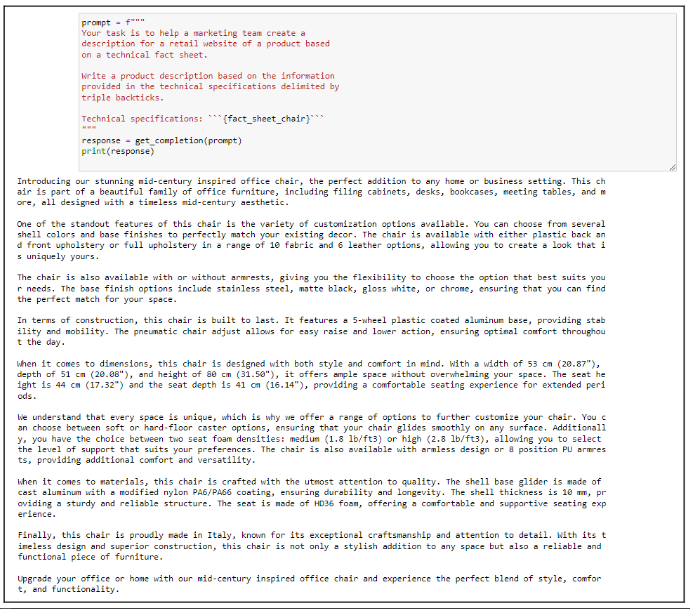

It looks like it's done a nice job writing a description, introducing a stunning mid-century inspired office chair, perfect addition, and so on. But when I look at this output, I go, boy, this is really long. It's done a nice job doing exactly what I asked it to, which is start from the technical fact sheet and write a product description. But when I look at this, I go, this is kind of long. 


### <div class="alert alert-info" >  Issue 1: The text is too long 

Maybe we want it to be a little bit shorter. So, I have had an idea, I wrote a prompt, got a result. I'm not that happy with it because it's too long. So, I will then clarify my prompt and say, use at most 50 words to try to give better guidance on the desired length of this. And let's run it 
again.

- Limit the number of words/sentences/characters.

In [6]:
prompt = f"""

Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.


Use at most 50 words.


Technical specifications: ```{fact_sheet_chair}```

"""

# response = get_completion(prompt)
# print(response)


As we run this we get the following output:
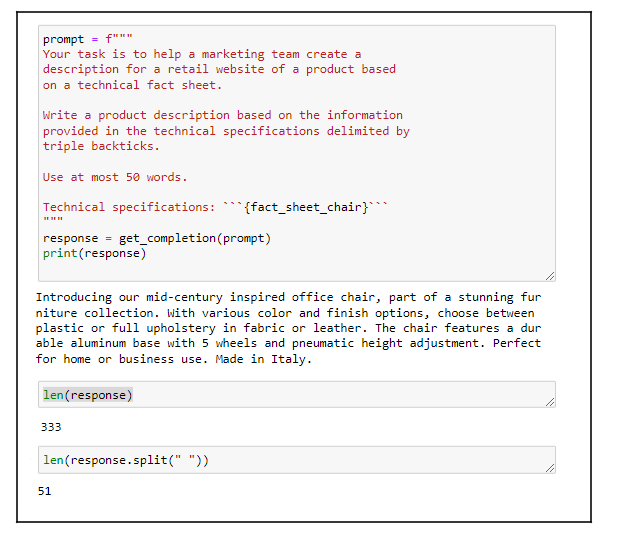

This actually looks like a much nicer short description of the product, introducing a mid-century inspired office chair, and so on. And let me double check the length that this is. So, I'm going to take the response, split it according to where the space is, and then, you know, print out the length. So it's 51 words. It's actually not bad. 

Large language models are okay, but not that great at following instructions about a very precise word count. But this is actually not bad. Sometimes it will print out something with 60 or 65 and so on words, but it's kind of within reason. Some of the things you could try to do would be, to say:

- use at most three sentences. 
- use at most 280 characters and so on.

Large language models, because of the way they interpret text, using something called a tokenizer, which I won't talk about. But they tend to be so-so at counting characters. Usually a large language model doesn't get it quite close to the required word count. But these are different ways that you can play with to try to control the length of the output that you get.



### <div class="alert alert-info" >  Issue 2. Text focuses on the wrong details
    
- Ask it to focus on the aspects that are relevant to the intended audience.  

As we continue to refine this text for our websites, we might decide that, boy, this website isn't selling direct to consumers, is actually intended to sell furniture to furniture retailers that would be more interested in the technical details of the chair and the materials of the chair. In that case, you can take this prompt and say, I want to modify this prompt to get it 
to be more precise about the technical details. So let me keep on modifying this prompt. 
    
And I'm going to say, `this description is intended for furniture retailers, so should be technical and focus on materials, 
products and constructed from` as below:

In [7]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
# response = get_completion(prompt)
# print(response)

 well, let's run this. 
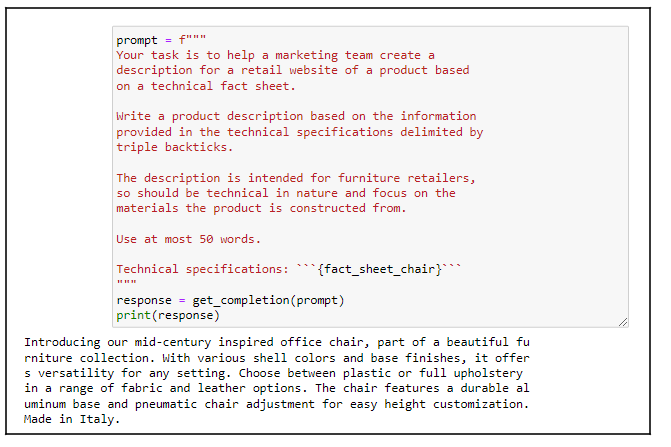

Not bad, says, you know, coated aluminum base and pneumatic chair, high-quality materials. So by changing the prompt, you 
can get it to focus more on specific characters, on specific characteristics you wanted to. And when I look at this, I might decide at the end of the description, I also wanted to include the product ID. So the two offerings of this chair, SWC 110, SWC 100. So, maybe I can further improve this prompt. 

And to get it to give me the product IDs, I can add this instruction at the end of the description, include every 7-character product ID in the technical specification

In [8]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
# response = get_completion(prompt)
# print(response)

Let's run it, and see what happens. 

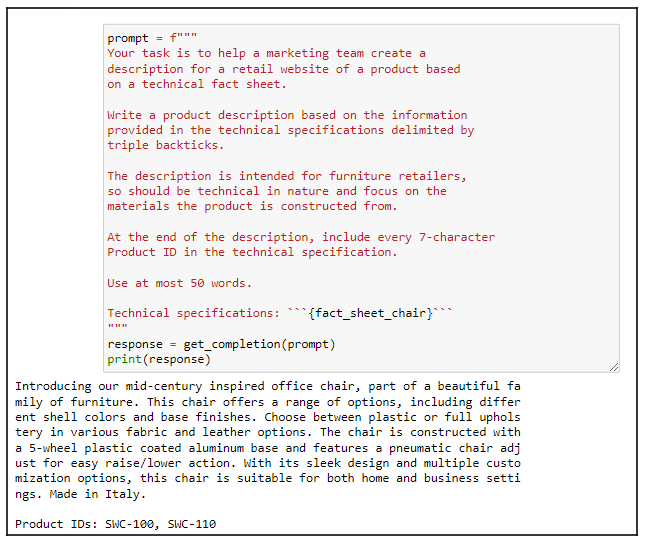

And so, it says, introduce you to our Miss Agents 5 office chair, shell colors, talks about plastic coating, aluminum base, practical, some options, talks about the two product IDs. So, this looks pretty good. And what you've just seen is a short example of the iterative prompt development that many developers will 
go through. 

    
Using guidelines for prompting covered in lesson 2 ( be clear and specific, and if necessary, give the model time to think). With these in mind, it's worthwhile to often take a first attempt at writing a prompt, see what happens, and then go from there 
to iteratively refine the prompt to get closer and closer to the result that you need. And so, a lot of the successful prompts that you may see used in various programs was arrived at an iterative process like this.
    

### <div class="alert alert-info" >  Issue 3. Description needs a table of dimensions

Just for fun, let me show you an example of a even more complex prompt that might give you a sense of what chatGPT 
can do, which is, I've just added a few extra instructions here. After the description, include a table that gives the product dimensions, and then, you know, format everything as HTML. So, let's run that. 

In [9]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_chair}```
"""

# response = get_completion(prompt)
# print(response)

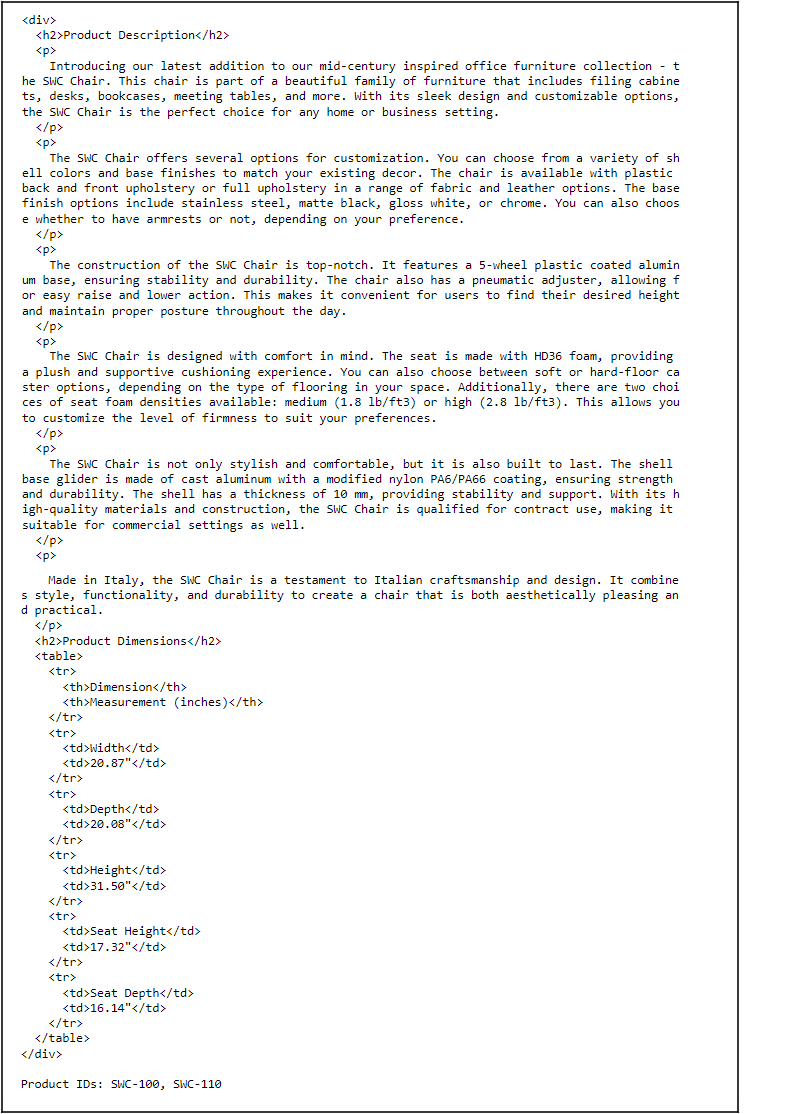
 
And in practice, you end up with a prompt like this, really only after multiple iterations. I don't think I know anyone 
that would write this exact prompt the first time they were trying to get the system to process a fact sheet.


#### Load Python libraries to view HTML

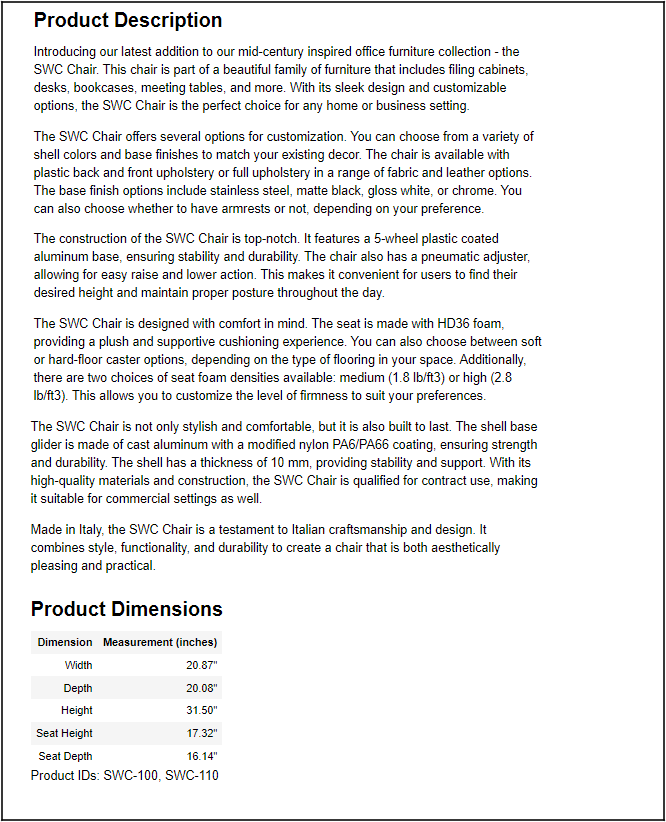

And so, this actually outputs a bunch of HTML.  Let's display the HTML to see if this is even valid 
HTML and see if this works. And I don't actually know it's going to work, but let's see. Oh, cool. All right. Looks like it rendered. So, it has this really nice looking description of a chair, construction, materials, product dimensions. 


Oh, it looks like I left out the use at most 50 words instruction, so this is a little bit long, but if you want that, you know, you can even feel free to pause the video, tell it to be more succinct and regenerate this and see what results you get. 
So, I hope you take away from this video that prompt development is an iterative process. Try something, see how it does not yet, fulfill exactly what you want, and then think about how to clarify your instructions, or in some cases, think about how to 
give it more space to think to get it closer to delivering the results that you want. And I think, the key to being an effective prompt engineer isn't so much about knowing the perfect prompt, it's about having a good process to develop 
prompts that are effective for your application. 

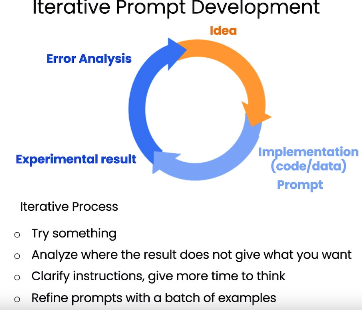

To summarize I illustrated developing a prompt using just one example. For more sophisticated applications, sometimes you will have multiple examples, say a list of 10 or even 50 or 100 fact sheets, and iteratively develop a prompt and evaluate it against a large set of cases. But for the early development of most applications, I see many people developing it sort of the way I am, with just one example, but then for more mature applications, sometimes it could be useful to evaluate prompts against a larger set of examples, such as to test different prompts on dozens of fact sheets to see how is average or worst case performances on multiple fact sheets. But usually, you end up doing that only when an application is more mature, and you have to have those metrics to drive that incremental last few steps of prompt improvement. 

